In [1]:
import sys
import os
script_dir = os.getcwd() # coleata o diretorio do projeto atual
sys.path.append(script_dir)

In [2]:
import numpy as np
import cv2

In [3]:
!git clone https://github.com/valmirf/processamento_imagens.git

fatal: destination path 'processamento_imagens' already exists and is not an empty directory.


In [4]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

#Exercícios

## 1) Utilize operações básicas para diminuir o ruído da imagem abaixo:

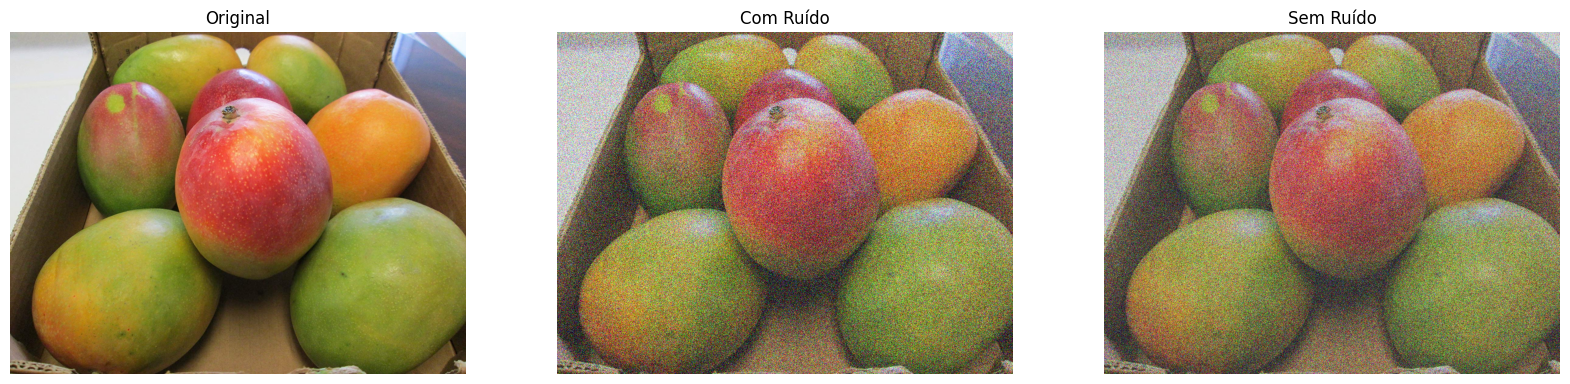

In [23]:

def add_noise(image, mean=0, stddev=25):
    """Adiciona ruído gaussiano à imagem."""
    row, col, ch = image.shape
    gauss = np.random.normal(mean, stddev, (row, col, ch))
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255)  # Garante que os valores fiquem dentro do intervalo [0, 255]
    return noisy.astype(np.uint8)


def remove_noise(noisy_image, n_runs = 10,  mean=0, stddev=25):
    row, col, ch = noisy_image.shape
    imagem_resultante = []

    for time in range(n_runs):
        gauss = np.random.normal(mean, stddev, (row, col, ch))
        clean_image = noisy_image + gauss
        clean_image = np.clip(clean_image, 0, 255)  # Garante que os valores fiquem dentro do intervalo [0, 255]
        imagem_resultante.append(clean_image)
    
    len_vector_images = len(imagem_resultante)
    imagem_resultante = sum(imagem_resultante)

    clean_image = imagem_resultante / len_vector_images
    clean_image = np.clip(clean_image, 0, 255)

    return clean_image.astype(np.uint8)
    

# Carrega a imagem
image = cv2.imread('processamento_imagens/imagens/mangas.jpg')

# Adiciona ruído à imagem
noisy_image = add_noise(image, 0, 100)

# Remove o ruído da imagem com ruído
clean_image = remove_noise(noisy_image, 50)
clean_image = remove_noise(clean_image, 50)
clean_image = remove_noise(clean_image, 50)


# Exibe a imagem original e a imagem com ruído
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Com Ruído')
ax[1].set_axis_off()
ax[2].imshow(cv2.cvtColor(clean_image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Sem Ruído')
ax[2].set_axis_off()





In [6]:
print(noisy_image.shape)
print(noisy_image)

(1125, 1500, 3)
[[[161 155 197]
  [142 180 213]
  [172 191 161]
  ...
  [244 242 217]
  [232 212 239]
  [255 255 255]]

 [[219 208 199]
  [175 171 213]
  [188 142 148]
  ...
  [228 249 191]
  [222 255 255]
  [238 231 224]]

 [[156 174 164]
  [158 164 191]
  [194 151 176]
  ...
  [247 218 227]
  [237 255 234]
  [199 249 227]]

 ...

 [[ 54  50  37]
  [ 44  99  89]
  [ 14  75  99]
  ...
  [  0  92 160]
  [  0  91  60]
  [ 33  89  93]]

 [[ 71  65  67]
  [ 84 100  79]
  [ 80  91  43]
  ...
  [  0  76 131]
  [  5  81  50]
  [ 45  57 152]]

 [[ 89 103 137]
  [129 147 117]
  [ 79 131 124]
  ...
  [ 40  57 124]
  [ 35 111 119]
  [  0  55 111]]]


## 2) Destaque apenas os aviões utizando as imagens abaixo com as operações de imagens.

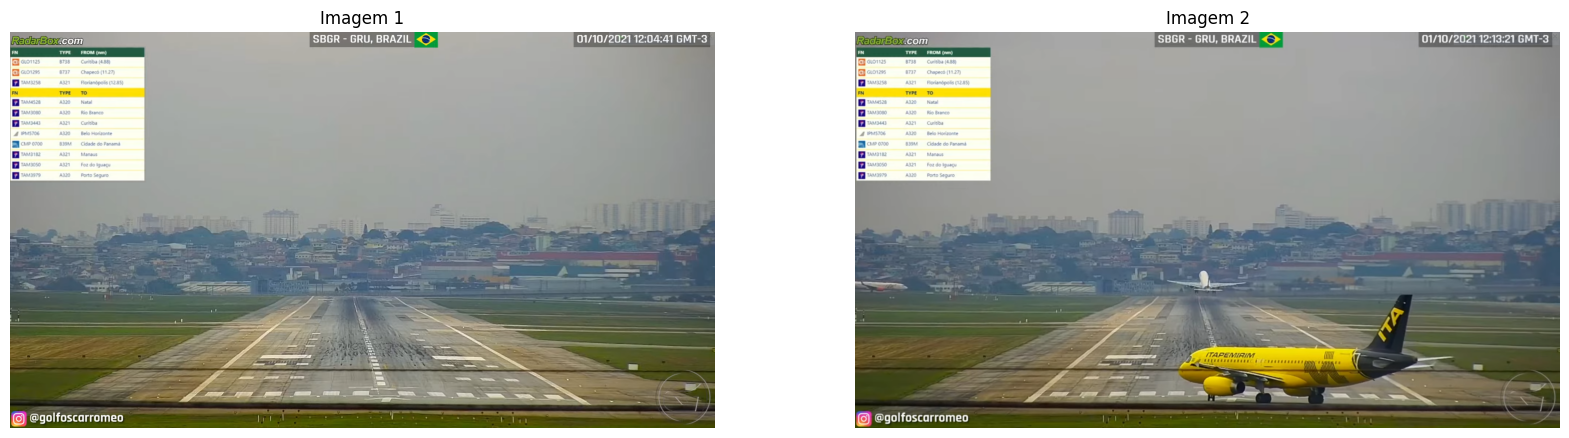

In [7]:
imggru1 = cv2.imread('processamento_imagens/imagens/fundo_aeroporto.png')
imggru2 = cv2.imread('processamento_imagens/imagens/avies_aeroporto.png')


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(cv2.cvtColor(imggru1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem 1')
ax[0].set_axis_off()
ax[1].imshow(cv2.cvtColor(imggru2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Imagem 2')
ax[1].set_axis_off()

## 3) Utilize rotação pra tentar deixar a torre abaixo reta

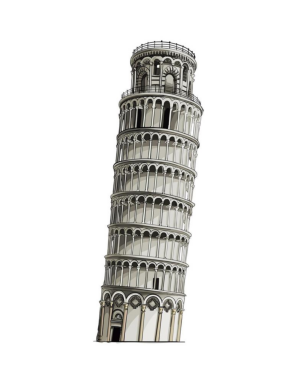

In [8]:
img = cv2.imread('processamento_imagens/imagens/pisa_inclinada.jpg')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 4) Utilize as técnicas de inteporlação na imagem abaixo pra melhorar sua resolução

a) Vizinhos mais próximos
b) Bicúbica

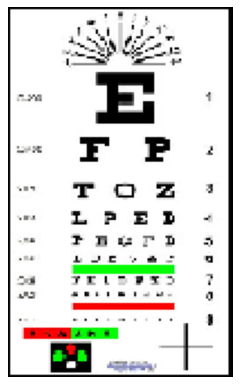

In [9]:
img = cv2.imread('processamento_imagens/imagens/baixa_resolucao.png')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 5) Utilize as técnicas abaixo pra tentar melhorar a qualidade da imagem abaixo:

a) Brilho
b) Contraste
c) Equalização do histograma

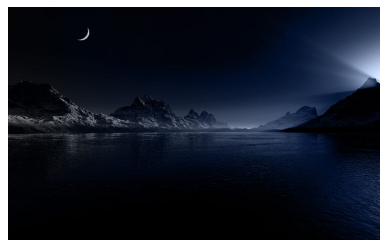

In [10]:
img = cv2.imread('processamento_imagens/imagens/paisagem_escura.jpg')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 6) Utilize as técnicas de alteração de cores em cada canal para transformar a imagem original numa imagem sépia, semelhante ao exemplo.

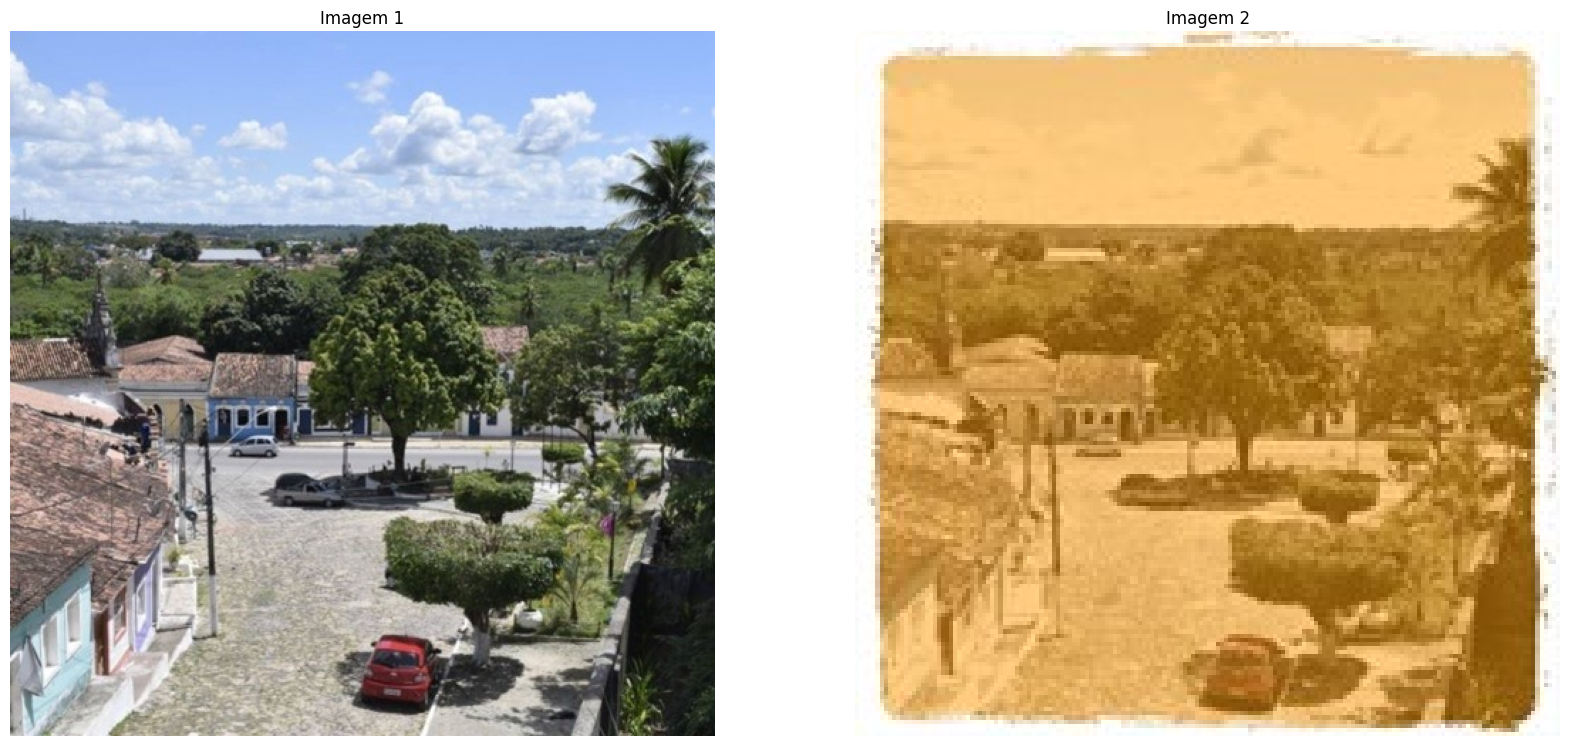

In [11]:
imggru1 = cv2.imread('processamento_imagens/imagens/igarassu.jpg')
imggru2 = cv2.imread('processamento_imagens/imagens/igarassu_sepia.jpg')


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(cv2.cvtColor(imggru1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Imagem 1')
ax[0].set_axis_off()
ax[1].imshow(cv2.cvtColor(imggru2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Imagem 2')
ax[1].set_axis_off()

## 7) Utilize as técnicas de binarização para encontrar a melhor versão binarizada da imagem abaixo. Mostre comparações entre técnicas e parâmetros.

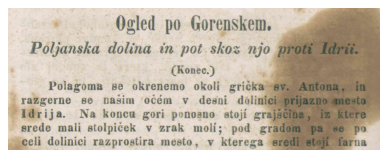

In [12]:
img = cv2.imread('processamento_imagens/imagens/PR4.bmp')


plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))